In [44]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [2]:
# Import our input dataset
df = pd.read_csv('Data/ML_ready_data.csv')
df.head()

,id,season,neutral_site,home_team_x,home_conference,home_points,home_pregame_elo,away_team_x,away_conference,away_points,away_pregame_elo,spread,margin
0,400763593,2015,False,UCF,American Athletic,14,1626,Florida International,Conference USA,15,1321,-17.0,1
1,400603840,2015,True,South Carolina,SEC,17,1646,North Carolina,ACC,13,1477,-3.5,-4
2,400763399,2015,False,Central Michigan,Mid-American,13,1417,Oklahoma State,Big 12,24,1567,20.5,11
3,400603839,2015,False,Vanderbilt,SEC,12,1365,Western Kentucky,Conference USA,14,1521,-17.5,2
4,400756883,2015,False,Utah,Pac-12,24,1603,Michigan,Big Ten,17,1553,-3.0,-7


In [3]:
train_df = df.query("season != 2022")
test_df = df.query("season == 2022")

In [4]:
football_df = df.drop(["id","season","home_team_x","away_team_x","home_points","away_points"],axis=1).dropna()

football_df.head()

,neutral_site,home_conference,home_pregame_elo,away_conference,away_pregame_elo,spread,margin
0,False,American Athletic,1626,Conference USA,1321,-17.0,1
1,True,SEC,1646,ACC,1477,-3.5,-4
2,False,Mid-American,1417,Big 12,1567,20.5,11
3,False,SEC,1365,Conference USA,1521,-17.5,2
4,False,Pac-12,1603,Big Ten,1553,-3.0,-7


In [5]:
# Generate our categorical variable lists
football_cat = football_df.dtypes[football_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(football_df[football_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(football_cat)
encode_df.head()

,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,home_conference_FBS Independents,home_conference_Mid-American,home_conference_Mountain West,home_conference_Pac-12,home_conference_SEC,...,away_conference_Ivy,away_conference_Mid-American,away_conference_Mountain West,away_conference_OVC,away_conference_Pac-12,away_conference_Patriot,away_conference_SEC,away_conference_SWAC,away_conference_Southern,away_conference_Sun Belt
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Merge one-hot encoded features and drop the originals
merged_df = football_df.merge(encode_df,left_index=True, right_index=True)
merged_df = merged_df.drop(football_cat,axis=1)
merged_df.head()

,neutral_site,home_pregame_elo,away_pregame_elo,spread,margin,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,...,away_conference_Ivy,away_conference_Mid-American,away_conference_Mountain West,away_conference_OVC,away_conference_Pac-12,away_conference_Patriot,away_conference_SEC,away_conference_SWAC,away_conference_Southern,away_conference_Sun Belt
0,False,1626,1321,-17.0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,True,1646,1477,-3.5,-4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,False,1417,1567,20.5,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,1365,1521,-17.5,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,1603,1553,-3.0,-7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#Convert boolean values to int
merged_df["neutral_site"]=merged_df["neutral_site"].astype(int)
merged_df.head()

,neutral_site,home_pregame_elo,away_pregame_elo,spread,margin,home_conference_ACC,home_conference_American Athletic,home_conference_Big 12,home_conference_Big Ten,home_conference_Conference USA,...,away_conference_Ivy,away_conference_Mid-American,away_conference_Mountain West,away_conference_OVC,away_conference_Pac-12,away_conference_Patriot,away_conference_SEC,away_conference_SWAC,away_conference_Southern,away_conference_Sun Belt
0,0,1626,1321,-17.0,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1646,1477,-3.5,-4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1417,1567,20.5,11,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1365,1521,-17.5,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1603,1553,-3.0,-7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
merged_df.margin.value_counts()

-3     239
-7     217
 3     207
 7     188
-14    141
      ... 
-74      1
 61      1
-67      1
 58      1
 62      1
Name: margin, Length: 129, dtype: int64

In [25]:
# Split our preprocessed data into our features and target arrays
y = merged_df.margin.values
X = merged_df.drop(columns=["margin"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(y.shape, X.shape)

(4775,) (4775, 34)


In [26]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 128
hidden_nodes_layer2 = 64

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               3500      
                                                                 
 dense_6 (Dense)             (None, 40)                4040      
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 7,581
Trainable params: 7,581
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/500
105/105 [==============================] - 1s 2ms/step - loss: -224554640.0000 - accuracy: 0.0051
Epoch 2/500
105/105 [==============================] - 0s 1ms/step - loss: -228758656.0000 - accuracy: 0.0051
Epoch 3/500
105/105 [==============================] - 0s 1ms/step - loss: -233032800.0000 - accuracy: 0.0051
Epoch 4/500
105/105 [==============================] - 0s 1ms/step - loss: -237386688.0000 - accuracy: 0.0051
Epoch 5/500
105/105 [==============================] - 0s 2ms/step - loss: -241840768.0000 - accuracy: 0.0051
Epoch 6/500
105/105 [==============================] - 0s 2ms/step - loss: -246395776.0000 - accuracy: 0.0051
Epoch 7/500
105/105 [==============================] - 0s 2ms/step - loss: -251007040.0000 - accuracy: 0.0051
Epoch 8/500
105/105 [==============================] - 0s 2ms/step - loss: -255726608.0000 - accuracy: 0.0051
Epoch 9/500
105/105 [==============================] - 0s 2ms/step - loss: -260506480.0000 - accuracy: 0.0051
Epoch 10/5

105/105 [==============================] - 0s 1ms/step - loss: -738469248.0000 - accuracy: 0.0051
Epoch 75/500
105/105 [==============================] - 0s 2ms/step - loss: -748495104.0000 - accuracy: 0.0051
Epoch 76/500
105/105 [==============================] - 0s 1ms/step - loss: -758595584.0000 - accuracy: 0.0051
Epoch 77/500
105/105 [==============================] - 0s 1ms/step - loss: -768881600.0000 - accuracy: 0.0051
Epoch 78/500
105/105 [==============================] - 0s 2ms/step - loss: -779106560.0000 - accuracy: 0.0051
Epoch 79/500
105/105 [==============================] - 0s 2ms/step - loss: -789489728.0000 - accuracy: 0.0051
Epoch 80/500
105/105 [==============================] - 0s 2ms/step - loss: -799956672.0000 - accuracy: 0.0051
Epoch 81/500
105/105 [==============================] - 0s 2ms/step - loss: -810537088.0000 - accuracy: 0.0051
Epoch 82/500
105/105 [==============================] - 0s 2ms/step - loss: -821197120.0000 - accuracy: 0.0051
Epoch 83/500
1

105/105 [==============================] - 0s 1ms/step - loss: -1720494208.0000 - accuracy: 0.0051
Epoch 148/500
105/105 [==============================] - 0s 2ms/step - loss: -1737654656.0000 - accuracy: 0.0051
Epoch 149/500
105/105 [==============================] - 0s 2ms/step - loss: -1755074816.0000 - accuracy: 0.0051
Epoch 150/500
105/105 [==============================] - 0s 2ms/step - loss: -1772558208.0000 - accuracy: 0.0051
Epoch 151/500
105/105 [==============================] - 0s 1ms/step - loss: -1790115456.0000 - accuracy: 0.0051
Epoch 152/500
105/105 [==============================] - 0s 2ms/step - loss: -1807744512.0000 - accuracy: 0.0051
Epoch 153/500
105/105 [==============================] - 0s 2ms/step - loss: -1825505664.0000 - accuracy: 0.0051
Epoch 154/500
105/105 [==============================] - 0s 2ms/step - loss: -1843356544.0000 - accuracy: 0.0051
Epoch 155/500
105/105 [==============================] - 0s 2ms/step - loss: -1861337600.0000 - accuracy: 0.00

105/105 [==============================] - 0s 2ms/step - loss: -3270440448.0000 - accuracy: 0.0051
Epoch 220/500
105/105 [==============================] - 0s 2ms/step - loss: -3296632832.0000 - accuracy: 0.0051
Epoch 221/500
105/105 [==============================] - 0s 2ms/step - loss: -3322914048.0000 - accuracy: 0.0051
Epoch 222/500
105/105 [==============================] - 0s 2ms/step - loss: -3349552640.0000 - accuracy: 0.0051
Epoch 223/500
105/105 [==============================] - 0s 2ms/step - loss: -3376091648.0000 - accuracy: 0.0051
Epoch 224/500
105/105 [==============================] - 0s 2ms/step - loss: -3402735360.0000 - accuracy: 0.0051
Epoch 225/500
105/105 [==============================] - 0s 2ms/step - loss: -3429470976.0000 - accuracy: 0.0051
Epoch 226/500
105/105 [==============================] - 0s 2ms/step - loss: -3456359168.0000 - accuracy: 0.0051
Epoch 227/500
105/105 [==============================] - 0s 2ms/step - loss: -3483625728.0000 - accuracy: 0.00

105/105 [==============================] - 0s 2ms/step - loss: -5521368064.0000 - accuracy: 0.0051
Epoch 292/500
105/105 [==============================] - 0s 2ms/step - loss: -5558073856.0000 - accuracy: 0.0051
Epoch 293/500
105/105 [==============================] - 0s 2ms/step - loss: -5595105280.0000 - accuracy: 0.0051
Epoch 294/500
105/105 [==============================] - 0s 2ms/step - loss: -5632279552.0000 - accuracy: 0.0051
Epoch 295/500
105/105 [==============================] - 0s 2ms/step - loss: -5669587456.0000 - accuracy: 0.0051
Epoch 296/500
105/105 [==============================] - 0s 2ms/step - loss: -5707209728.0000 - accuracy: 0.0051
Epoch 297/500
105/105 [==============================] - 0s 2ms/step - loss: -5744727040.0000 - accuracy: 0.0051
Epoch 298/500
105/105 [==============================] - 0s 2ms/step - loss: -5782423040.0000 - accuracy: 0.0051
Epoch 299/500
105/105 [==============================] - 0s 2ms/step - loss: -5820452352.0000 - accuracy: 0.00

105/105 [==============================] - 0s 2ms/step - loss: -8598667264.0000 - accuracy: 0.0051
Epoch 364/500
105/105 [==============================] - 0s 2ms/step - loss: -8647846912.0000 - accuracy: 0.0051
Epoch 365/500
105/105 [==============================] - 0s 2ms/step - loss: -8697214976.0000 - accuracy: 0.0051
Epoch 366/500
105/105 [==============================] - 0s 2ms/step - loss: -8746969088.0000 - accuracy: 0.0051
Epoch 367/500
105/105 [==============================] - 0s 2ms/step - loss: -8796963840.0000 - accuracy: 0.0051
Epoch 368/500
105/105 [==============================] - 0s 2ms/step - loss: -8846834688.0000 - accuracy: 0.0051
Epoch 369/500
105/105 [==============================] - 0s 2ms/step - loss: -8897209344.0000 - accuracy: 0.0051
Epoch 370/500
105/105 [==============================] - 0s 2ms/step - loss: -8947403776.0000 - accuracy: 0.0051
Epoch 371/500
105/105 [==============================] - 0s 2ms/step - loss: -8998037504.0000 - accuracy: 0.00

105/105 [==============================] - 0s 2ms/step - loss: -12623800320.0000 - accuracy: 0.0051
Epoch 436/500
105/105 [==============================] - 0s 2ms/step - loss: -12687230976.0000 - accuracy: 0.0051
Epoch 437/500
105/105 [==============================] - 0s 2ms/step - loss: -12750494720.0000 - accuracy: 0.0051
Epoch 438/500
105/105 [==============================] - 0s 2ms/step - loss: -12814237696.0000 - accuracy: 0.0051
Epoch 439/500
105/105 [==============================] - 0s 2ms/step - loss: -12878264320.0000 - accuracy: 0.0051
Epoch 440/500
105/105 [==============================] - 0s 2ms/step - loss: -12942216192.0000 - accuracy: 0.0051
Epoch 441/500
105/105 [==============================] - 0s 2ms/step - loss: -13006571520.0000 - accuracy: 0.0051
Epoch 442/500
105/105 [==============================] - 0s 2ms/step - loss: -13071285248.0000 - accuracy: 0.0051
Epoch 443/500
105/105 [==============================] - 0s 2ms/step - loss: -13136321536.0000 - accur

<AxesSubplot:>

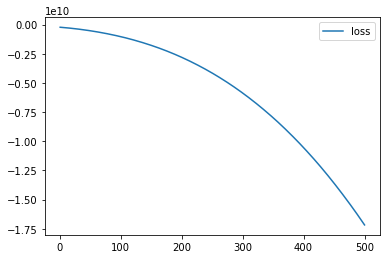

In [39]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

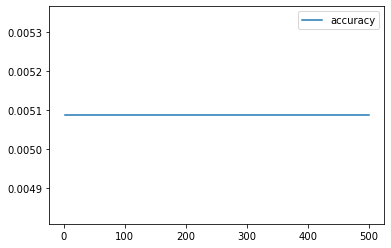

In [41]:
# Plot the accuracy
history_df.plot(y="accuracy")

AttributeError: 'numpy.ndarray' object has no attribute 'columns'